In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
consumption=['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','SOCCB','WDCCB','WSCCB','ESCCB','LOCCB','SFCCB','WYCCB','CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','HYICB','SOICB','WDICB','WSICB','ESICB','LOICB','SFINB','WYICB','CLRCB','NGRCB','PARCB','GERCB','SORCB','WDRCB','ESRCB','LORCB','CLACB','NGACB','PAACB','EMACB','ESACB','LOACB','TEACB','TECCB','TEICB','TERCB'
]
production=['HYCCB','GEEGB','HYEGB','SOEGB','WYEGB','HYICB','ENPRP','HYTXB']
total=consumption+production+['ELEXB','ELIMB']
state=['AZ','NM','CA','TX']
x=range(1960,2010)
t=range(50)
path='C:\\Python27\\Scripts\\MCM\\'

## TX

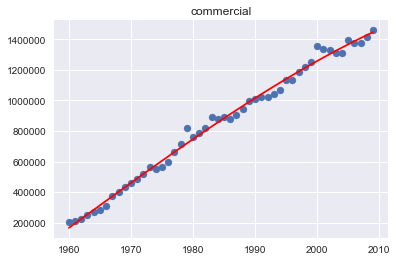

[ -1.47516983e+00   2.07694921e+00   2.95952373e+04   1.65349850e+05]


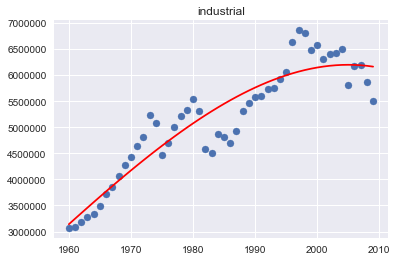

[ -1.43487217e+01  -2.17811605e+02   1.06814350e+05   3.14036020e+06]


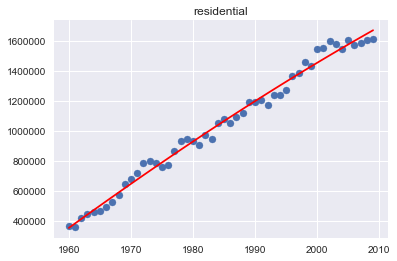

[ -2.21416779e-01  -5.07375413e+01   2.99892545e+04   3.50553014e+05]


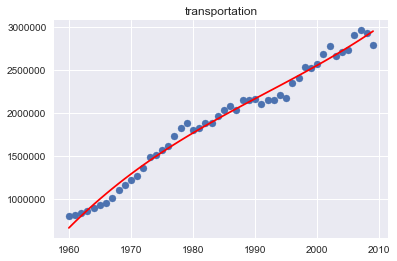

[  1.14923886e+01  -1.08774230e+03   7.24687555e+04   6.58490254e+05]


In [4]:
df=pd.read_csv(path+'TX.csv')
sectordict={'commercial':['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','WDCCB','ESCCB','LOCCB','SFCCB'],
         'industrial':['CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','WDICB','WSICB','ESICB','LOICB','SFINB'],
         'residential':['SFRCB','GERCB','WDRCB','CLRCB','NGRCB','PARCB','ESRCB','LORCB'],
         'transportation':['CLACB','NGACB','PAACB','EMACB','ESACB','LOACB']}
sectory={}
for k,v in sectordict.items():
    sectory[k]=[]
    for i in range(1960,2010):
        sectory[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
for k,v in sectory.items():
    plt.scatter(x,v)
    z= np.polyfit(t,v, 3)
    p= np.poly1d(z)
    plt.plot(x,p(t),color='red')
    plt.title(k)
    plt.show()
    print (z)

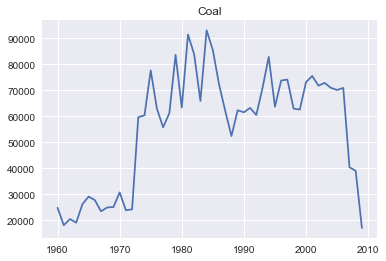

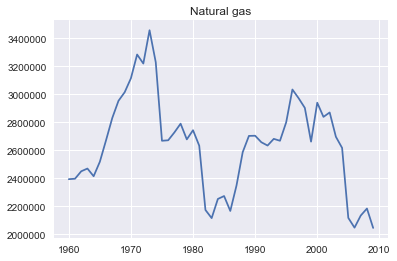

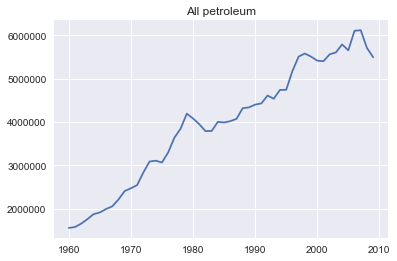

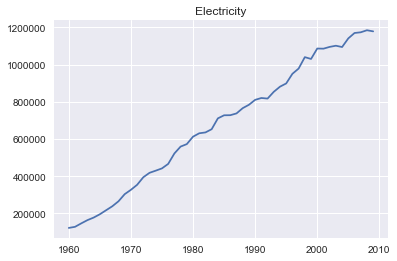

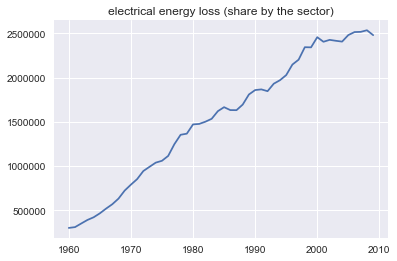

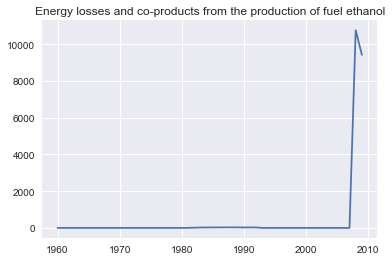

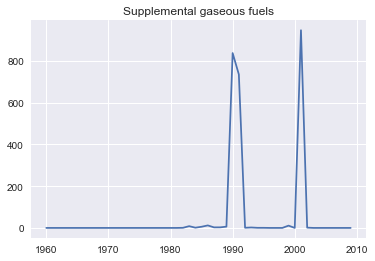

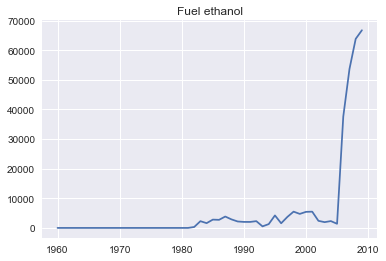

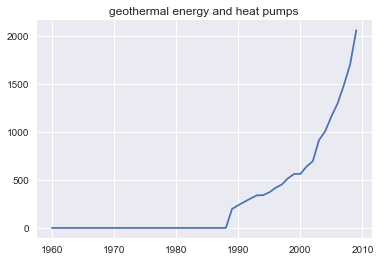

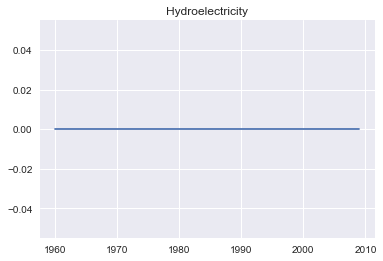

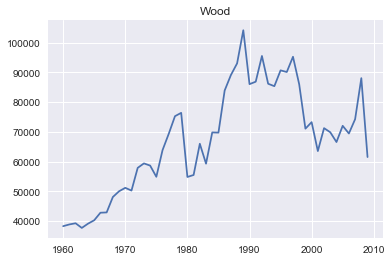

In [5]:
#按种类细分consumption

sectordict={'Coal':['CLCCBC','CLICB','CLRCB','CLACB'], 
'Natural gas':['NGCCB','NGICB','NGRCB','NGACB'],
'All petroleum':['PACCB','PAICB','PARCB','PAACB'],
'Electricity':['ESCCB','ESICB','ESRCB','ESACB'],
'electrical energy loss (share by the sector)':['LOCCB','LOICB','LORCB','LOACB'],
'Energy losses and co-products from the production of fuel ethanol':['EMLCB'],
'Supplemental gaseous fuels':['SFCCB','SFINB','SFRCB'],
'Fuel ethanol':['EMCCB','EMICB','EMACB'],
'geothermal energy and heat pumps':['GECCB','GEICB','GERCB'],
'Hydroelectricity':['HYCCB'],
'Wood':['WDCCB','WDICB','WDRCB']
}

y={}
for k,v in sectordict.items():
    y[k]=[]
    for i in range(1960,2010):
        y[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
for k,v in y.items():
    plt.plot(x,v)
    plt.title(k)
    plt.show()

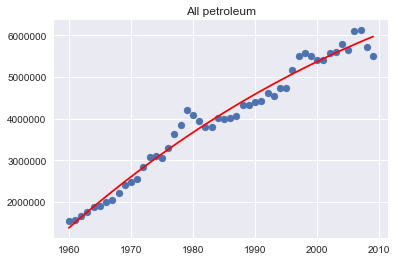

[  2.19828300e+00  -8.71418654e+02   1.31219803e+05   1.37403966e+06]


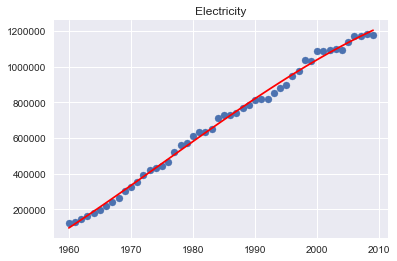

[ -2.56754190e+00   1.20812034e+02   2.28886600e+04   9.46886287e+04]


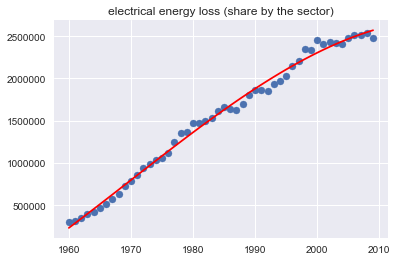

[ -7.54318089e+00   2.17502707e+02   5.51692379e+04   2.31848794e+05]


In [6]:
#只做 All petroleum Eletricty electricalloss的拟合
sectordict={'All petroleum':['PACCB','PAICB','PARCB','PAACB'],'Electricity':['ESCCB','ESICB','ESRCB','ESACB'],'electrical energy loss (share by the sector)':['LOCCB','LOICB','LORCB','LOACB']
}
y={}
for k,v in sectordict.items():
    y[k]=[]
    for i in range(1960,2010):
        y[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
for k,v in y.items():
    plt.scatter(x,v)
    z= np.polyfit(t,v, 3)
    p= np.poly1d(z)
    plt.plot(x,p(t),color='red')
    plt.title(k)
    plt.show()
    print (z)

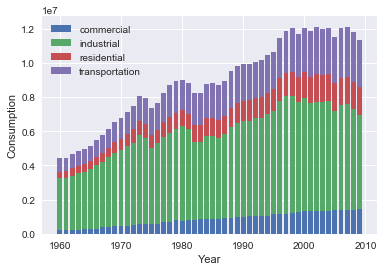

In [4]:
ind = np.arange(1960,2010)
sectordict={'commercial':['CLCCB','NGCCB','PACCB','EMCCB','GECCB','HYCCB','WDCCB','ESCCB','LOCCB','SFCCB'],
         'industrial':['CLICB','NGICB','PAICB','EMICB','EMLCB','GEICB','WDICB','WSICB','ESICB','LOICB','SFINB'],
         'residential':['SFRCB','GERCB','WDRCB','CLRCB','NGRCB','PARCB','ESRCB','LORCB'],
         'transportation':['CLACB','NGACB','PAACB','EMACB','ESACB','LOACB']}
sectory={}
for k,v in sectordict.items():
    sectory[k]=[]
    for i in range(1960,2010):
        sectory[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
        
        
data = sectory.values()
bottom = np.zeros(50)
for elem in data:
    plt.bar(ind, elem,bottom=bottom)
    bottom += elem
plt.legend( ('commercial', 'industrial','residential','transportation'))
plt.xlabel('Year')
plt.ylabel('Consumption')

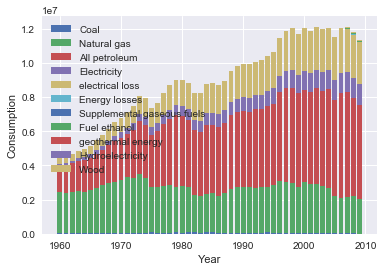

In [11]:

sectordict={'Coal':['CLCCBC','CLICB','CLRCB','CLACB'], 
'Natural gas':['NGCCB','NGICB','NGRCB','NGACB'],
'All petroleum':['PACCB','PAICB','PARCB','PAACB'],
'Electricity':['ESCCB','ESICB','ESRCB','ESACB'],
'electrical loss':['LOCCB','LOICB','LORCB','LOACB'],
'Energy losses':['EMLCB'],
'Supplemental gaseous fuels':['SFCCB','SFINB','SFRCB'],
'Fuel ethanol':['EMCCB','EMICB','EMACB'],
'geothermal energy':['GECCB','GEICB','GERCB'],
'Hydroelectricity':['HYCCB'],
'Wood':['WDCCB','WDICB','WDRCB']}
ind = np.arange(1960,2010)
y={}
for k,v in sectordict.items():
    y[k]=[]
    for i in range(1960,2010):
        y[k].append(sum(df[(df.MSN.isin(v))&(df.Year==i)].Data))
data = y.values()
bottom = np.zeros(50)


for elem in data:
    plt.bar(ind, elem,bottom=bottom)
    bottom += elem
    i+=1
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend((y.keys()),loc='upper left')

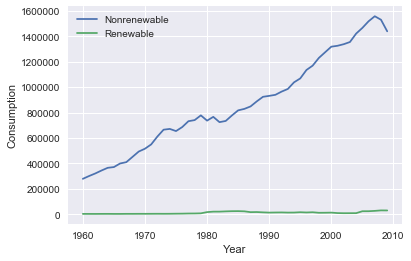

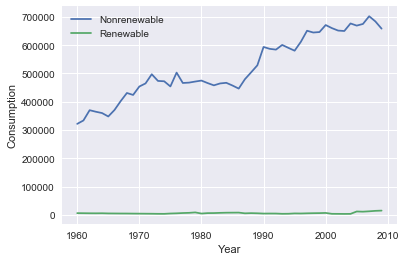

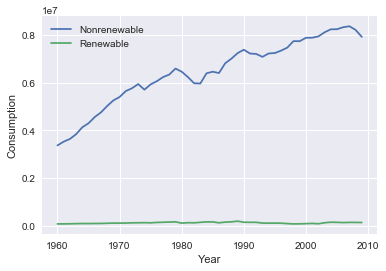

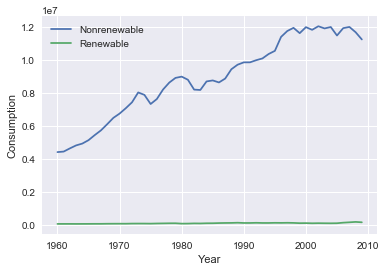

In [11]:
nonrenew=['CLCCBC','NGCCB','PACCB','ESCCB','LOCCB','SFCCB','CLICB','NGICB','PAICB','EMLCB','ESICB','LOICB','SFINB','SFRCB','CLRCB','NGRCB','PARCB','ESRCB','LORCB','CLACB','NGACB','PAACB','ESACB','LOACB']
renew=['EMCCB','GECCB','HYCCB','WDCCB','EMICB','GEICB','WDICB','WSICB','GERCB','WDRCB','EMACB']

for s in state:
    nonec=[]
    renewc=[]
    df=pd.read_csv(path+s+'.csv')
    for i in range(1960,2010):
        nonec.append(sum(df[(df.MSN.isin(nonrenew))&(df.Year==i)].Data))
        renewc.append(sum(df[(df.MSN.isin(renew))&(df.Year==i)].Data))
    plt.plot(range(1960,2010),nonec,label='Nonrenewable')
    plt.plot(range(1960,2010),renewc,label='Renewable')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.show()

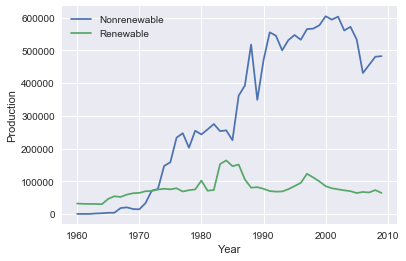

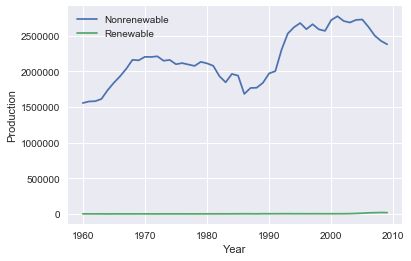

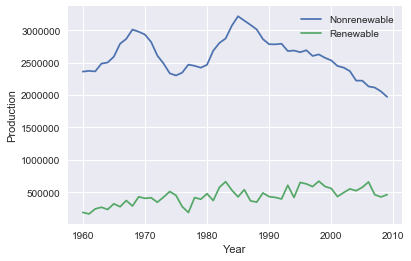

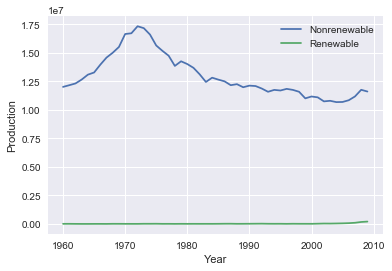

In [12]:
nonrenew=['NGMPB',
'NUETB',
'PAPRB',
'CLPRB'
]
renew=[
'HYCCB',
'GEEGB',
'HYEGB',
'SOEGB',
'WYEGB',
'HYICB',
'ENPRP',
'HYTXB'
]

for s in state:
    nonec=[]
    renewc=[]
    df=pd.read_csv(path+s+'.csv')
    for i in range(1960,2010):
        nonec.append(sum(df[(df.MSN.isin(nonrenew))&(df.Year==i)].Data))
        renewc.append(sum(df[(df.MSN.isin(renew))&(df.Year==i)].Data))
    plt.plot(range(1960,2010),nonec,label='Nonrenewable')
    plt.plot(range(1960,2010),renewc,label='Renewable')
    plt.xlabel('Year')
    plt.ylabel('Production')
    plt.legend()
    plt.show()